In [3]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
dataset=pd.read_csv('./Data/olympics_100m.csv')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<AxesSubplot:xlabel='features', ylabel='targets'>

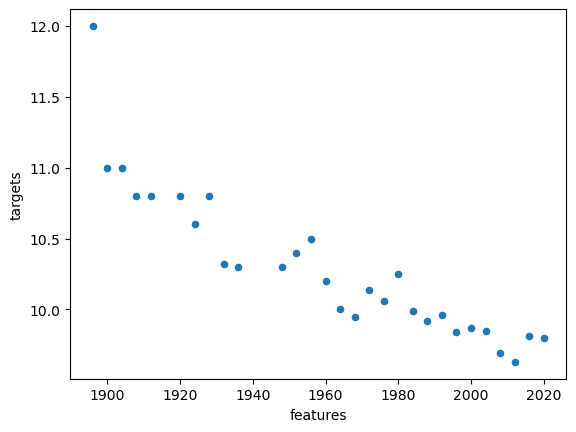

In [4]:
#plot
dataset.plot.scatter(x='features',y='targets')

In [7]:
from ridge import Ridge_Regression
X=dataset['features'].values.reshape(-1,1)
Y=dataset['targets'].values.reshape(-1,1)
## given the low amount of data available we decided to do a leave-one-out K-fold cross validation
## the parameter lambda follows a coarse to fine approach
## the coarse search is done with a step of 0.1 and the fine search with a step of 0.01
lambda_values=np.linspace(0,500,num=(500+1))
for subinterval in 10 ** np.arange(10 + 1): 
    lambda_mses=[]
    print('subinterval: ',subinterval)
    for lambda_value in lambda_values:
        ridge=Ridge_Regression(lambda_value)
        mses=[]
        for i,value in enumerate(X):
            Xi=np.delete(X,i,axis=0)
            Yi=np.delete(Y,i,axis=0)
            ridge.Train(Xi,Yi)
            y_pred=ridge.Predict(X[i].reshape(1,-1))
            mses.append(((Y[i]-y_pred)**2).mean()) #the mean here is not necessary since we are doing leave-one-out but still keeping it for consistency
        lambda_mses.append(np.mean(mses))
        print('lambda: ',lambda_value,' mse: ',np.mean(mses))
    print('best lambda atm: ',lambda_values[np.argmin(lambda_mses)])
    lambda_values=np.linspace(max(lambda_values[np.argmin(lambda_mses)]-1,0)/subinterval,lambda_values[np.argmin(lambda_mses)]+1/subinterval,num=(20+1))
lambda_value=lambda_values[np.argmin(lambda_mses)]

subinterval:  1
lambda:  0.0  mse:  0.06150176587907515
lambda:  1.0  mse:  0.508299726099053
lambda:  2.0  mse:  0.512775924306286
lambda:  3.0  mse:  0.5142829449210438
lambda:  4.0  mse:  0.5150392870838929
lambda:  5.0  mse:  0.5154940020496483
lambda:  6.0  mse:  0.5157975251208784
lambda:  7.0  mse:  0.5160145135036339
lambda:  8.0  mse:  0.5161773566515309
lambda:  9.0  mse:  0.5163040727899141
lambda:  10.0  mse:  0.5164054837065
lambda:  11.0  mse:  0.5164884813803463
lambda:  12.0  mse:  0.5165576633469282
lambda:  13.0  mse:  0.5166162141540306
lambda:  14.0  mse:  0.5166664094573117
lambda:  15.0  mse:  0.5167099186801424
lambda:  16.0  mse:  0.5167479942828566
lambda:  17.0  mse:  0.5167815942902994
lambda:  18.0  mse:  0.5168114640110201
lambda:  19.0  mse:  0.516838191970868
lambda:  20.0  mse:  0.5168622490791563
lambda:  21.0  mse:  0.5168840166125105
lambda:  22.0  mse:  0.5169038065719875
lambda:  23.0  mse:  0.5169218767331265
lambda:  24.0  mse:  0.5169384419358304

In [8]:
ridge=Ridge_Regression(lambda_value)
ridge.Train(X,Y)
x=np.array([2010,2012,2014,2016,2018,2020]).reshape(-1,1)
y_pred=ridge.Predict(x.reshape(-1,1))
from sklearn.linear_model import Ridge
ridge_sklearn=Ridge(alpha=lambda_value)
ridge_sklearn.fit(X,Y)
y_pred_sklearn=ridge_sklearn.predict(x.reshape(-1,1))
for i in range(len(X)):
    print('year: ',X[i],' time: ',Y[i])
for i in range(len(x)):
    print('year: ',x[i],' time: ',y_pred[i])
    print('scikit: year: ',x[i],' time: ',y_pred_sklearn[i])

year:  [1896]  time:  [12.]
year:  [1900]  time:  [11.]
year:  [1904]  time:  [11.]
year:  [1908]  time:  [10.8]
year:  [1912]  time:  [10.8]
year:  [1920]  time:  [10.8]
year:  [1924]  time:  [10.6]
year:  [1928]  time:  [10.8]
year:  [1932]  time:  [10.32]
year:  [1936]  time:  [10.3]
year:  [1948]  time:  [10.3]
year:  [1952]  time:  [10.4]
year:  [1956]  time:  [10.5]
year:  [1960]  time:  [10.2]
year:  [1964]  time:  [10.]
year:  [1968]  time:  [9.95]
year:  [1972]  time:  [10.14]
year:  [1976]  time:  [10.06]
year:  [1980]  time:  [10.25]
year:  [1984]  time:  [9.99]
year:  [1988]  time:  [9.92]
year:  [1992]  time:  [9.96]
year:  [1996]  time:  [9.84]
year:  [2000]  time:  [9.87]
year:  [2004]  time:  [9.85]
year:  [2008]  time:  [9.69]
year:  [2012]  time:  [9.63]
year:  [2016]  time:  [9.81]
year:  [2020]  time:  [9.8]
year:  [2010]  time:  [9.69203763]
scikit: year:  [2010]  time:  [9.69091578]
year:  [2012]  time:  [9.66761584]
scikit: year:  [2012]  time:  [9.66644794]
year